In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import matplotlib.pyplot as plt

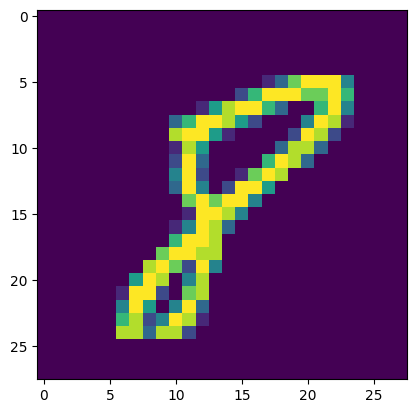

In [7]:
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

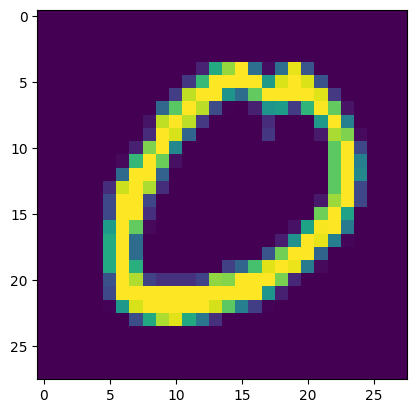

In [13]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [64]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
X_train.shape

(33600, 784)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier()

In [69]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:
# Calculating time taken by KNN Classifier to predict.
# KNN predicts based on closest image to the image in question.
import time
start = time.time()

y_pred = knn.predict(X_test)
print(time.time() - start)

12.241302490234375


In [58]:
from sklearn.metrics import accuracy_score
print("Accuracy with KNN Classifier without PCA:",accuracy_score(y_test,y_pred)*100)

Accuracy with KNN Classifier without PCA: 96.48809523809524


In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [71]:
# Step-1: Mean centric data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [73]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [74]:
X_train_trf.shape

(33600, 100)

In [75]:
knn = KNeighborsClassifier()

In [76]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [77]:
y_pred = knn.predict(X_test_trf)
print("Accuracy with KNN after applying PCA: ",accuracy_score(y_test,y_pred)*100)

Accuracy with KNN after applying PCA:  95.26190476190476


In [78]:
# Accuracy decreased. 
# Means we need to increase our components within PCA (currently n_components is 100)

In [ ]:
# Below we apply the above method in a loop to find the ideal component no. where accuracy with pca is decent enough.


In [80]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()

    knn.fit(X_train_trf,y_train)
    y_pred = knn.predict(X_test_trf)
    print(f"Component count:{i}, Accuracy Score:{accuracy_score(y_test,y_pred)}")

Component count:1, Accuracy Score:0.25761904761904764
Component count:2, Accuracy Score:0.3242857142857143
Component count:3, Accuracy Score:0.5103571428571428
Component count:4, Accuracy Score:0.6661904761904762
Component count:5, Accuracy Score:0.7382142857142857
Component count:6, Accuracy Score:0.8220238095238095
Component count:7, Accuracy Score:0.8435714285714285
Component count:8, Accuracy Score:0.8729761904761905
Component count:9, Accuracy Score:0.8864285714285715
Component count:10, Accuracy Score:0.9053571428571429
Component count:11, Accuracy Score:0.9130952380952381
Component count:12, Accuracy Score:0.919404761904762
Component count:13, Accuracy Score:0.9297619047619048
Component count:14, Accuracy Score:0.9346428571428571
Component count:15, Accuracy Score:0.9383333333333334
Component count:16, Accuracy Score:0.9383333333333334
Component count:17, Accuracy Score:0.9404761904761905
Component count:18, Accuracy Score:0.9401190476190476
Component count:19, Accuracy Score:0.

In [ ]:
# As no. of components increase, accuracy improve

In [ ]:
# Visualization 

In [84]:
# Transforming in 2D
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [85]:
X_train_trf

array([[-2.71861712, -0.4900273 ],
       [-0.67698832, -6.75342267],
       [-3.03323423,  6.50978638],
       ...,
       [ 2.14883065,  0.78066068],
       [ 1.05960796,  0.94731328],
       [17.70263721,  1.96186496]])

In [89]:
# Visualization of 2D transformed data
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [90]:
# Transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [91]:
X_train_trf

array([[-2.7187312 , -0.49012308,  1.13523704],
       [-0.67698038, -6.75383239, -2.33482945],
       [-3.03313533,  6.51021914,  7.49144691],
       ...,
       [ 2.14895958,  0.78106103, -0.74667023],
       [ 1.0594689 ,  0.94739557,  3.94937249],
       [17.702502  ,  1.96146706, -4.94300891]])

In [92]:
# Visualization of 3D transformed data
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [94]:
# Applying pca with all 784 components in consideration
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

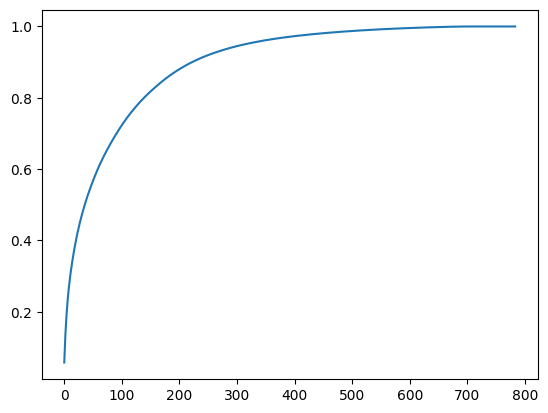

In [95]:
# Calculating cummulative sum for pecentage variance given by resp. eigenvalues one by one 
np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# from the below graph, we can see, at around 300 eigenvalues, percentage variance > 90% (optimum value)
# Hence we shall have 300 PCs in our reduced dataset